<a href="https://colab.research.google.com/github/konan-91/OcularClassification/blob/master/notebooks/1_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WORK IN PROGRESS! Please check back later.

#Generating Topoplots from Blinks

Our first step is to transform the dataset of ocular & non-ocular EEG data into spectograms (image files) that we can use to train the model.

In [ ]:
!pip install mne -q
!pip install pymatreader -q

In [ ]:
import mne
import pymatreader
import matplotlib.pyplot as plt
import numpy as np
import os

##Loading the data

Note: if you are running this notebook yourself, please ensure the zipped osf dataset is present at the root of your working directory. In Colab, this is /content.

In [ ]:
!unzip -q /content/osfstorage-archive.zip
!rm /content/osfstorage-archive.zip

In [ ]:
def load_data(folderpath, data):
    for filename in os.listdir(folderpath):
        if filename.endswith(".set"):
            filepath = os.path.join(folderpath, filename)
            epochs = mne.read_epochs_eeglab(filepath) # The dataset we use comes pre-epoched
            data.append(epochs)

In [ ]:
#mne.set_log_level('ERROR')
path = "/content/osfstorage-archive"
participants_data = [] # List of participants, who are objects containing (many) epochs

for study in os.listdir(path):
    study_path = os.path.join(path, study)
    if os.path.isdir(study_path):
        load_data(study_path, participants_data)

/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(
/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(
/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(
/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(
/usr/local/lib/python3.11/dist-packages/pymatreader/utils.py:168: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mi

{'1/fixation': 1, '3/eye-d/eye-u/eye-d/eye-u/eye-d/eye-u/eye-u/eye-d/eye-u': 2, '3/eye-d/eye-u/eye-d/eye-u/eye-u/eye-d/eye-u/eye-d/eye-u/eye-u': 3, '2/eye-l/eye-r/eye-l/eye-r/eye-l/eye-r/eye-l/eye-r/eye-l': 4, '4/blink/blink/blink/blink/blink/blink': 5, '2/eye-l/eye-r/eye-r/eye-l/eye-r/eye-r/eye-l/eye-r/eye-l/eye-r/eye-l': 6, '3/eye-d/eye-u/eye-d/eye-u/eye-d/eye-d/eye-u/eye-u/eye-d/eye-u': 7, '1/fixation/fixation': 8, '4/blink/blink/blink/blink/blink/blink/blink': 9, '3/eye-d/eye-u/eye-d/eye-u/eye-u/eye-d/eye-u/eye-d/eye-u': 10, '2/eye-l/eye-r/eye-l/eye-r/eye-l/eye-r/eye-l/eye-r': 11, '2/eye-l/eye-r/eye-l/eye-r/eye-l/eye-r/eye-r/eye-l/eye-r/eye-l': 12, '3/eye-d/eye-u/eye-u/eye-d/eye-u/eye-u/eye-d/eye-u/eye-d/eye-u/eye-d': 13, '3/eye-d/eye-u/eye-d/eye-u/eye-u/eye-d/eye-u/eye-u/eye-d/eye-u/eye-u': 14, '3/eye-d/eye-u/eye-d/eye-u/eye-d/eye-u/eye-d/eye-d/eye-u/eye-u/eye-d/eye-d/eye-u': 15, '2/eye-l/eye-r/eye-l/eye-r/eye-r/eye-l/eye-r/eye-l/eye-r/eye-l': 16, '3/eye-d/eye-u/eye-d/eye-d/eye-u/

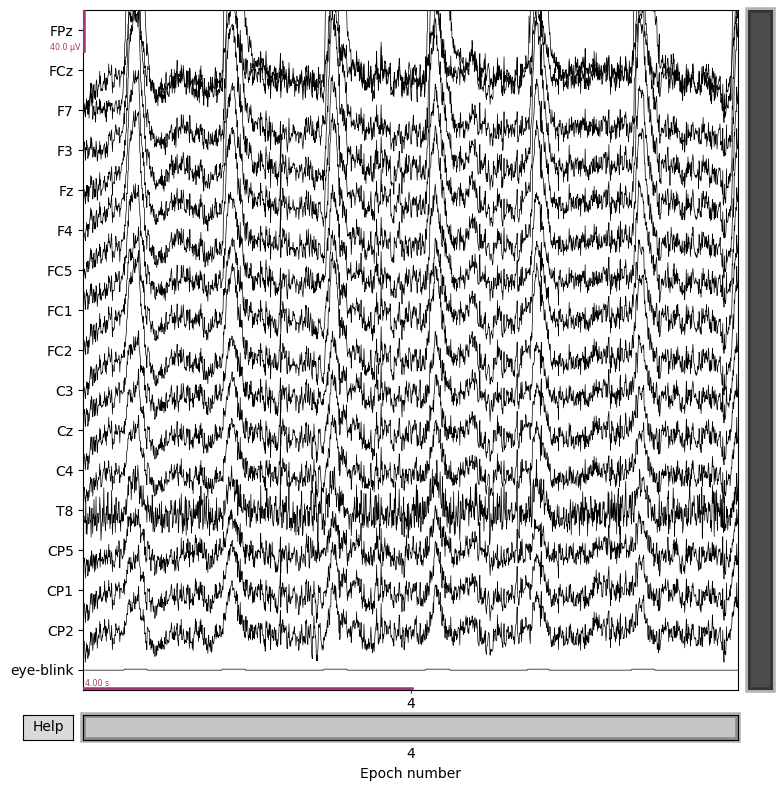

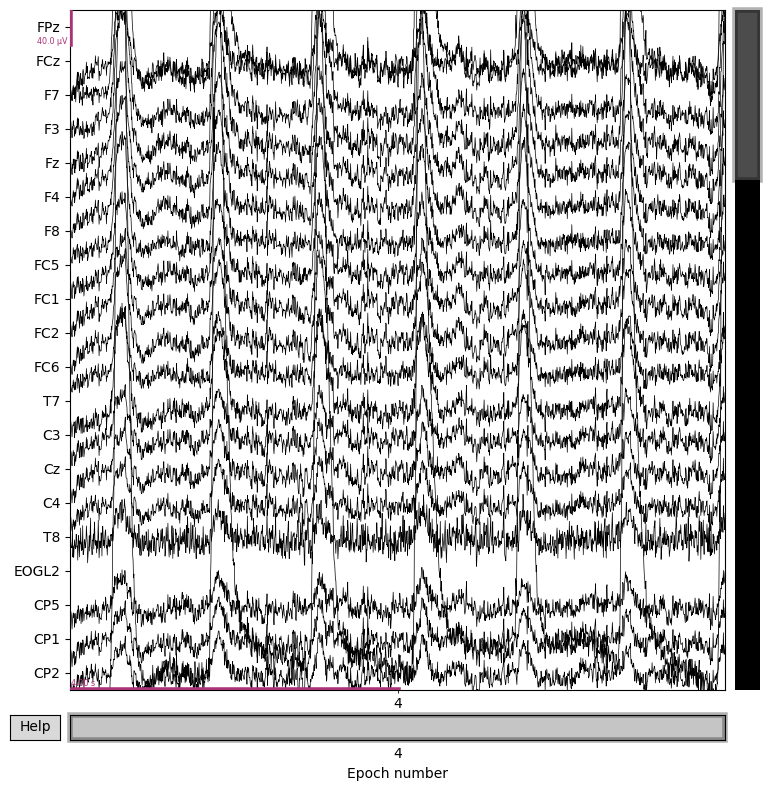

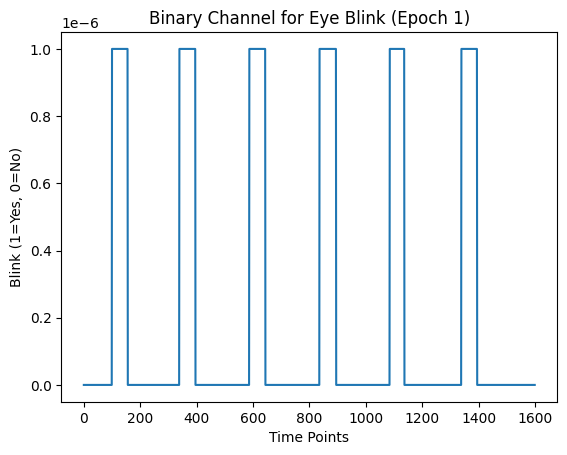

In [ ]:
participant_1 = participants_data[0]
print(participant_1.event_id)

blinks_1 = participant_1['4'] # Filter for blink epochs only
print(blinks_1.event_id)

# SPECIFIC CHANNELS ONLY!
blinks_1[0].plot(picks=['eye-blink', 'C3', 'C4', 'FPz', 'FCz', 'F7', 'F3', 'Fz', 'F4', 'FC5', 'FC1', 'FC2', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2])

binary_data = blinks_1.get_data(picks='eye-blink')
blinks_1[0].plot()

plt.plot(binary_data[0].T)  # Transpose to plot time on the x-axis
plt.xlabel('Time Points')
plt.ylabel('Blink (1=Yes, 0=No)')
plt.title('Binary Channel for Eye Blink (Epoch 1)')
plt.show()